#Cartographie exploratoire numérique des textes
Formation ARIANE - Consortium Huma-num

Auteur: Carmen Brando (EHESS)

Notebook Carto Ariane © 2023 by Carmen Brando is licensed under CC BY-NC-SA 4.0

In [193]:
!git clone https://github.com/cvbrandoe/FormationAriane.git

fatal: destination path 'FormationAriane' already exists and is not an empty directory.


### Visualisation des entités nommées du corpus Eltec-FR

Données annotées fournies en format JSON:


`Brando, Carmen; Frontini, Francesca and Galleron, Ioana, 2022, French ELTEC NER Open Dataset, ILC-CNR for CLARIN-IT repository hosted at Institute for Computational Linguistics "A. Zampolli", National Research Council, in Pisa, http://hdl.handle.net/20.500.11752/OPEN-986.`

In [194]:
path_to_json = 'FormationAriane/donnees/eltecfr/'

Transformation des données du format JSON en tableur (ex. CSV)

In [195]:
cat_mapping = {'e_1':'PERS', 'e_2':'LOC', 'e_3':'ORG', 'e_7':'ROLE', 'e_5':'WORK', 'e_6':'DEMO', 'e_8':'EVENT', 'e_4':'OTHER'}

In [196]:
import os, json
import pandas as pd

json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

jsons_data = pd.DataFrame(columns=['classId', 'start', 'mention', 'title'])

for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        ents = json_text['entities']
        for en in ents:
          classId = cat_mapping[en['classId']]
          start = en['offsets'][0]['start']
          txt = en['offsets'][0]['text']
          jsons_data.loc[index] = [classId, start, txt, str(js[30:].replace('.txt.ann.json', ''))]

print(jsons_data)

   classId  start        mention               title
0     PERS   3787     M. Richaud     RA05501_Lermina
1    OTHER  12560         Maries      RA07001_Mendes
2     PERS   9379  de Croixville         RA01801_Gay
3      LOC   1092        Espagne      RA03101_Ponson
4     PERS   3630     Charbovari    RA01302_Flaubert
..     ...    ...            ...                 ...
95    PERS   2470  Mme Massereau    RA01401_Fleuriot
96    PERS   2420        Jacques         RA06501_Gyp
97     LOC   3314   rue de Judée     RA07401_Leblanc
98    PERS   5740  Myra Roderich       RA04002_Verne
99     LOC   3272       Hollande  RA02702_Maupassant

[100 rows x 4 columns]


Utilisation du module [Pandas](https://pandas.pydata.org/) pour manipuler et explorer les annotations désormais en format tableur.

In [197]:
jsons_data.sample(5)

,classId,start,mention,title
72,PERS,6939,madame de Chavoncourt,RA00501_Balzac
68,PERS,10804,M. de Malzonvilliers,RA04301_Achard
33,PERS,4702,Ranine,RA02303_Greville
24,LOC,4859,Paris,RA01501_France
94,PERS,5231,Belle,RA02302_Greville


In [198]:
jsons_data[['classId']].groupby(['classId'])['classId'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

,classId,count
4,PERS,64
1,LOC,25
0,DEMO,5
3,OTHER,3
2,ORG,2
5,WORK,1


In [199]:
jsons_data.loc[jsons_data['classId'].isin(['PERS'])]

,classId,start,mention,title
0,PERS,3787,M. Richaud,RA05501_Lermina
2,PERS,9379,de Croixville,RA01801_Gay
4,PERS,3630,Charbovari,RA01302_Flaubert
7,PERS,3444,Sabine,RA02901_Noailles
9,PERS,5944,La Mesnarde,RA01202_Feval
...,...,...,...,...
93,PERS,46116,Bernardin de Saint-Pierre,RA00503_Balzac
94,PERS,5231,Belle,RA02302_Greville
95,PERS,2470,Mme Massereau,RA01401_Fleuriot
96,PERS,2420,Jacques,RA06501_Gyp


In [200]:
jsons_data_loc = jsons_data.loc[jsons_data['classId'].isin(['LOC'])]
jsons_data_loc

,classId,start,mention,title
3,LOC,1092,Espagne,RA03101_Ponson
5,LOC,3969,Paris,RA00201_Audoux
6,LOC,1601,Marbeuf,RA05301_Galopin
8,LOC,4945,Paris,RA05901_Moselly
10,LOC,3897,France,RA02401_LeRouge
18,LOC,6100,Enghien,RA01402_Fleuriot
19,LOC,2796,Montmartre,RA00601_Boisgobey
20,LOC,3982,La Neuville,RA03001_Ohnet
24,LOC,4859,Paris,RA01501_France
25,LOC,1852,Canada,RA00302_Aimard


In [201]:
jsons_data_per = jsons_data.loc[jsons_data['classId'].isin(['PERS'])]
jsons_data_per

,classId,start,mention,title
0,PERS,3787,M. Richaud,RA05501_Lermina
2,PERS,9379,de Croixville,RA01801_Gay
4,PERS,3630,Charbovari,RA01302_Flaubert
7,PERS,3444,Sabine,RA02901_Noailles
9,PERS,5944,La Mesnarde,RA01202_Feval
...,...,...,...,...
93,PERS,46116,Bernardin de Saint-Pierre,RA00503_Balzac
94,PERS,5231,Belle,RA02302_Greville
95,PERS,2470,Mme Massereau,RA01401_Fleuriot
96,PERS,2420,Jacques,RA06501_Gyp


Visualisation les nombres d'occurrences avec un nuage des mots

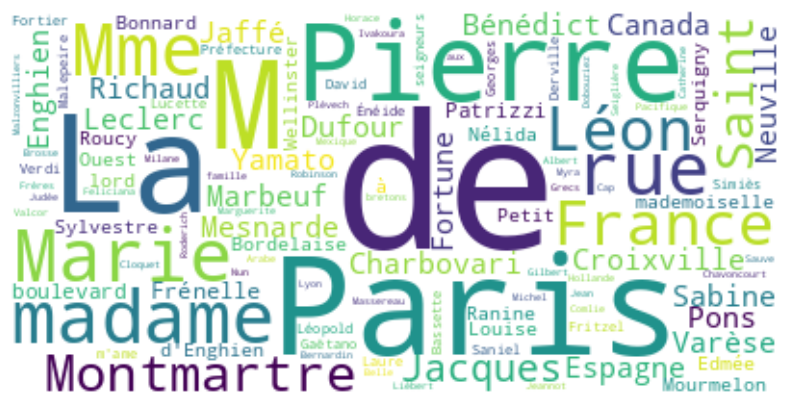

In [202]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(i for i in jsons_data.mention)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Visualisation par catégorie, PERS et LOC

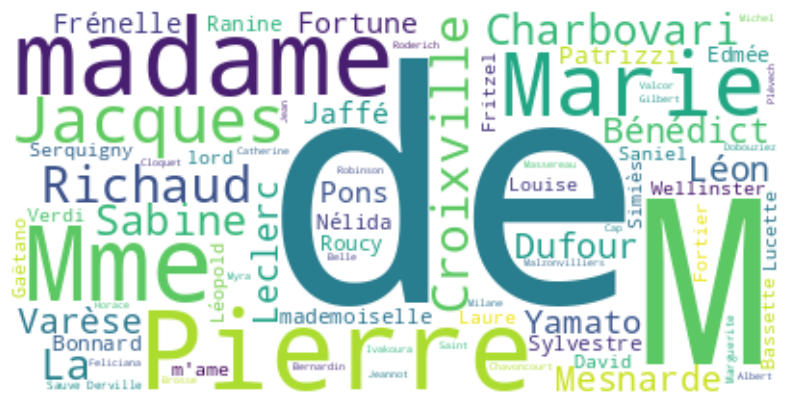

In [203]:
text = " ".join(i for i in jsons_data_per.mention)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

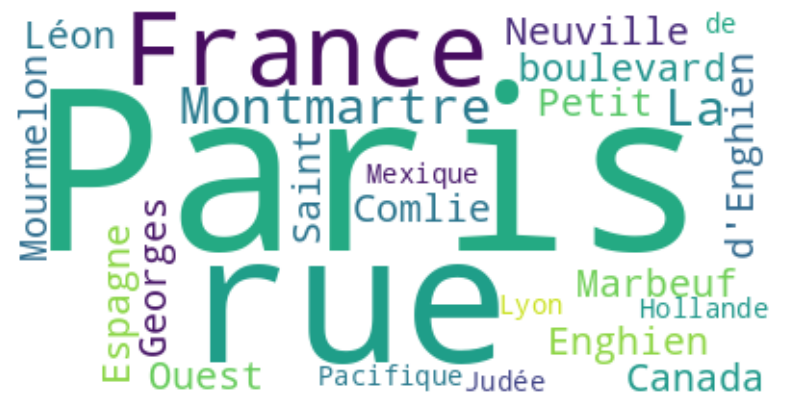

In [204]:
text = " ".join(i for i in jsons_data_loc.mention)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###Cartographie des lieux du Ventre de Paris (Zola, extrait, chap.1)

Obtention des coordonnées de localisation des noms de lieux balisés dans un document XML/TEI donné (`le-ventre-de-paris_1.wikidata.tei-gold.xml`) comprenant des liens de désambiguisation vers Wikidata. Par exemple,

`<placeName ref="http://www.wikidata.org/entity/Q1573266">pont de Neuilly</placeName>`

Le module suivant, https://pypi.org/project/Wikidata, sert à interroger en ligne la base de connaissance [Wikidata](https://www.wikidata.org).

In [205]:
!pip install wikidata

In [206]:
zola_folder = "FormationAriane/donnees/LVP_Zola/"

Liste des noms de lieux balisés et leurs identifiant wikidata (IRI)

In [207]:
import sys, csv, re
from wikidata.client import Client
from lxml import etree

tree = etree.parse(zola_folder+"le-ventre-de-paris_1.wikidata.tei-gold.xml")
tab = []
uris = set()
for p in tree.xpath(".//s:placeName", namespaces={'s': 'http://www.tei-c.org/ns/1.0'}):
  if p.attrib['ref'] != '':
    tab.append([p.attrib['ref'], p.text]);
    uris.add(p.attrib['ref'])
print("Done")
print(uris)


Done
{'http://www.wikidata.org/entity/Q3449531', 'http://www.wikidata.org/entity/Q3149352', 'http://www.wikidata.org/entity/Q3593358', 'http://www.wikidata.org/entity/Q3450270', 'http://www.wikidata.org/entity/Q41983', 'http://www.wikidata.org/entity/Q3449239', 'http://www.wikidata.org/entity/Q895080', 'http://www.wikidata.org/entity/Q3451857', 'http://www.wikidata.org/entity/Q1356926', 'http://www.wikidata.org/entity/Q1027566', 'http://www.wikidata.org/entity/Q2174628', 'http://www.wikidata.org/entity/Q2112543', 'http://www.wikidata.org/entity/Q1787799', 'http://www.wikidata.org/entity/Q3449238', 'http://www.wikidata.org/entity/Q236736', 'http://www.wikidata.org/entity/Q44401', 'http://www.wikidata.org/entity/Q42810', 'http://www.wikidata.org/entity/Q587372', 'http://www.wikidata.org/entity/Q2307722', 'http://www.wikidata.org/entity/Q15217751', 'http://www.wikidata.org/entity/Q3448182', 'http://www.wikidata.org/entity/Q691278', 'http://www.wikidata.org/entity/Q3098218', 'http://www.wi

Interrogation de Wikidata pour obtenir des données associées à chaque entitée identifiée par un IRI

In [208]:
print("Retrieving RDF data from IRIs and capturing coordinates and other information")
print("This may take a while..")
coordsByUri = {}
namesByUri = {}
typesbyUri = {}
client = Client()
for uri in uris:
  #print(uri+" - graph parsed")
  ent_id = uri.split('/')
  entity = client.get(ent_id[len(ent_id)-1], load=True)

  typ_prop = client.get('P31')

  geo_prop = client.get('P625')
  if entity.attributes['claims'].get(geo_prop.id):
    coordsByUri[uri] = str(entity.attributes['claims'][geo_prop.id][0]['mainsnak']['datavalue']['value']['longitude']) + "|" + str(entity.attributes['claims'][geo_prop.id][0]['mainsnak']['datavalue']['value']['latitude'])
  else:
    coordsByUri[uri] = "-|-"
  namesByUri[uri] = entity.label
  typesbyUri[uri] = entity[typ_prop].label

print("Done")

Retrieving RDF data from IRIs and capturing coordinates and other information
This may take a while..
Done


In [209]:
coordsByUri

{'http://www.wikidata.org/entity/Q3449531': '2.34889|48.8633',
 'http://www.wikidata.org/entity/Q3149352': '2.34524|48.8605',
 'http://www.wikidata.org/entity/Q3593358': '2.4375|48.8161',
 'http://www.wikidata.org/entity/Q3450270': '2.3433|48.8617',
 'http://www.wikidata.org/entity/Q41983': '5.35|47.818333333333',
 'http://www.wikidata.org/entity/Q3449239': '2.3468611111111|48.864944444444',
 'http://www.wikidata.org/entity/Q895080': '2.35138889|48.86444444',
 'http://www.wikidata.org/entity/Q3451857': '2.34672|48.8598',
 'http://www.wikidata.org/entity/Q1356926': '2.3433333333333|48.846666666667',
 'http://www.wikidata.org/entity/Q1027566': '2.341389|48.871667',
 'http://www.wikidata.org/entity/Q2174628': '2.35|48.86416667',
 'http://www.wikidata.org/entity/Q2112543': '2.349722|48.841944',
 'http://www.wikidata.org/entity/Q1787799': '2.3322222222222|48.864722222222',
 'http://www.wikidata.org/entity/Q3449238': '2.3439|48.8676',
 'http://www.wikidata.org/entity/Q236736': '1.485|49.0916

In [210]:
namesByUri

{'http://www.wikidata.org/entity/Q3449531': m'rue Pierre-Lescot',
 'http://www.wikidata.org/entity/Q3149352': m'Impasse des Bourdonnais',
 'http://www.wikidata.org/entity/Q3593358': m'île de Charentonneau',
 'http://www.wikidata.org/entity/Q3450270': m'rue Vauvilliers',
 'http://www.wikidata.org/entity/Q41983': m'Marne',
 'http://www.wikidata.org/entity/Q3449239': m'rue Montorgueil',
 'http://www.wikidata.org/entity/Q895080': m'boulevard de Sébastopol',
 'http://www.wikidata.org/entity/Q3451857': m'Rue des Halles',
 'http://www.wikidata.org/entity/Q1356926': m'rue Saint-Jacques',
 'http://www.wikidata.org/entity/Q1027566': m'boulevard Montmartre',
 'http://www.wikidata.org/entity/Q2174628': m'rue Saint-Denis',
 'http://www.wikidata.org/entity/Q2112543': m'rue Mouffetard',
 'http://www.wikidata.org/entity/Q1787799': m'rue Saint-Honoré',
 'http://www.wikidata.org/entity/Q3449238': m'rue Montmartre',
 'http://www.wikidata.org/entity/Q236736': m'Vernon',
 'http://www.wikidata.org/entity/Q4

In [211]:
typesbyUri

{'http://www.wikidata.org/entity/Q3449531': m'street',
 'http://www.wikidata.org/entity/Q3149352': m'dead end street',
 'http://www.wikidata.org/entity/Q3593358': m'river island',
 'http://www.wikidata.org/entity/Q3450270': m'street',
 'http://www.wikidata.org/entity/Q41983': m'river',
 'http://www.wikidata.org/entity/Q3449239': m'street',
 'http://www.wikidata.org/entity/Q895080': m'boulevard',
 'http://www.wikidata.org/entity/Q3451857': m'street',
 'http://www.wikidata.org/entity/Q1356926': m'street',
 'http://www.wikidata.org/entity/Q1027566': m'boulevard',
 'http://www.wikidata.org/entity/Q2174628': m'street',
 'http://www.wikidata.org/entity/Q2112543': m'street',
 'http://www.wikidata.org/entity/Q1787799': m'street',
 'http://www.wikidata.org/entity/Q3449238': m'street',
 'http://www.wikidata.org/entity/Q236736': m'commune of France',
 'http://www.wikidata.org/entity/Q44401': m'commune of France',
 'http://www.wikidata.org/entity/Q42810': m'commune of France',
 'http://www.wikidat

Production de sortie tableur avec les coordonnées et d'autres informations associés aux lieux

In [212]:
print("Writing data to CSV file")
with open(zola_folder+"places.csv", 'w') as csvfile:
	fieldnames = ['src', 'IRI', 'placeMention', 'lat', 'long', 'placeName', 'type']
	writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
	writer.writeheader()
	for t in tab:
		x,y = coordsByUri[t[0]].split("|")
		src_file = sys.argv[1].split("/")
		writer.writerow({'src' : src_file[len(src_file)-1], 'IRI': t[0],
                   'placeMention': t[1], 'lat': y.strip(), 'long': x.strip(),
                   'placeName': namesByUri[t[0]], 'type': typesbyUri[t[0]]})

Writing data to CSV file


Associer des données géographiques, les emprises des quartiers de Paris, d'OpenData Paris, en format [SIG](https://fr.wikipedia.org/wiki/Syst%C3%A8me_d%27information_g%C3%A9ographique) [SHP](https://fr.wikipedia.org/wiki/Shapefile), à l'aide du module [GeoPandas](https://geopandas.org/).

In [213]:
!pip install geopandas

In [214]:
import geopandas

In [215]:
quartier_paris = "FormationAriane/donnees/opendata-paris/"

In [216]:
gdf_quartier = geopandas.read_file(quartier_paris+"quartier_paris.shp", encoding='utf-8')

In [217]:
gdf_quartier = gdf_quartier.set_index("n_sq_qu")
gdf_quartier

,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geometry
n_sq_qu,,,,,,,,
750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ..."
750000016.0,16.0,7510404.0,Notre-Dame,4.0,750000004.0,3283.163371,3.782522e+05,"POLYGON ((2.36131 48.84858, 2.36151 48.84823, ..."
750000028.0,28.0,7510704.0,Gros-Caillou,7.0,750000007.0,4720.994373,1.381893e+06,"POLYGON ((2.30954 48.85396, 2.30646 48.85413, ..."
750000041.0,41.0,7511101.0,Folie-Méricourt,11.0,750000011.0,3724.352694,7.257525e+05,"POLYGON ((2.37010 48.86376, 2.36690 48.86246, ..."
750000007.0,7.0,7510203.0,Mail,2.0,750000002.0,2179.153605,2.781426e+05,"POLYGON ((2.34684 48.86491, 2.34668 48.86443, ..."
...,...,...,...,...,...,...,...,...
750000014.0,14.0,7510402.0,Saint-Gervais,4.0,750000004.0,2678.340923,4.220282e+05,"POLYGON ((2.36376 48.85568, 2.36294 48.85456, ..."
750000025.0,25.0,7510701.0,Saint-Thomas-d'Aquin,7.0,750000007.0,3827.253353,8.265594e+05,"POLYGON ((2.32213 48.84925, 2.32054 48.84842, ..."
750000038.0,38.0,7511002.0,Porte-Saint-Denis,10.0,750000010.0,2736.292954,4.721136e+05,"POLYGON ((2.35534 48.87126, 2.35426 48.86933, ..."


<Axes: >

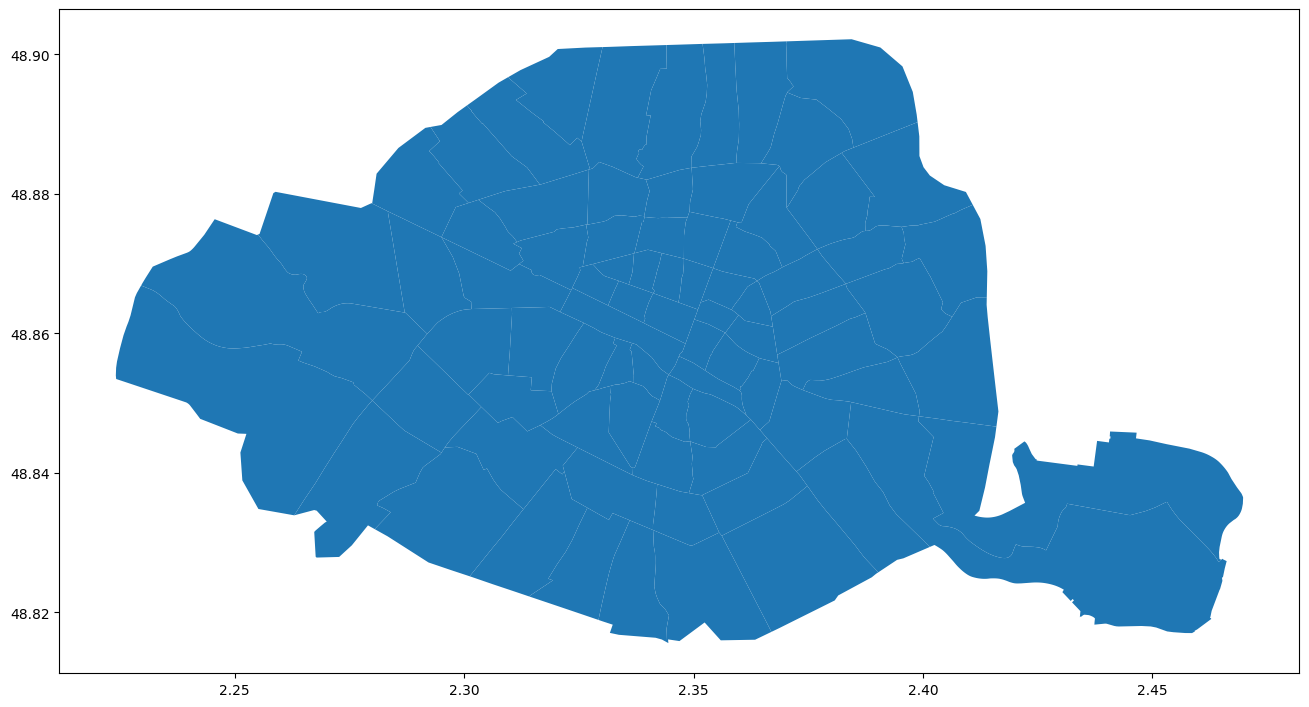

In [218]:
gdf_quartier["geometry"].plot(figsize=(16, 16))

Visualier les lieux cités dans le Ventre de Paris et les quartiers de Paris

In [219]:
import pandas as pd
df_zola = pd.read_csv(zola_folder+"places.csv")

In [220]:
df_zola

,src,IRI,placeMention,lat,long,placeName,type
0,-f,http://www.wikidata.org/entity/Q90,Paris,48.85666666666667,2.352222222222222,Paris,territorial collectivity of France with specia...
1,-f,http://www.wikidata.org/entity/Q1573266,pont de Neuilly,48.88666667,2.25472222,Pont de Neuilly,stone bridge
2,-f,http://www.wikidata.org/entity/Q170507,Nanterre,48.890555555556,2.2036111111111,Nanterre,commune of France
3,-f,http://www.wikidata.org/entity/Q587372,rue de Longchamp,48.8659,2.28221,rue de Longchamp,street
4,-f,http://www.wikidata.org/entity/Q90,Paris,48.85666666666667,2.352222222222222,Paris,territorial collectivity of France with specia...
...,...,...,...,...,...,...,...
170,-f,http://www.wikidata.org/entity/Q730948,Jardin des Plantes,48.843888888889,2.3597222222222,Jardin des plantes,botanical garden
171,-f,http://www.wikidata.org/entity/Q3391723,Plassans,-,-,Plassans,fictional city
172,-f,http://www.wikidata.org/entity/Q3447583,rue Cuvier,48.8453,2.35798,rue Cuvier,street
173,-f,http://www.wikidata.org/entity/Q3449570,rue Pirouette,48.8618,2.34717,rue Pirouette,street


Vérification que les colonnes lat et long sont comprises comme des nombres décimales

In [221]:
df_zola['lat'] = pd.to_numeric(df_zola['lat'],errors='coerce')


In [222]:
df_zola['long'] = pd.to_numeric(df_zola['long'],errors='coerce')


Création du jeu de données géographique à partir du tableur grâce aux coordonnées lat long

In [223]:
gdf_zola_ = geopandas.GeoDataFrame(
    df_zola, geometry=geopandas.points_from_xy(df_zola.long, df_zola.lat))

In [224]:
gdf_zola_

,src,IRI,placeMention,lat,long,placeName,type,geometry
0,-f,http://www.wikidata.org/entity/Q90,Paris,48.856667,2.352222,Paris,territorial collectivity of France with specia...,POINT (2.35222 48.85667)
1,-f,http://www.wikidata.org/entity/Q1573266,pont de Neuilly,48.886667,2.254722,Pont de Neuilly,stone bridge,POINT (2.25472 48.88667)
2,-f,http://www.wikidata.org/entity/Q170507,Nanterre,48.890556,2.203611,Nanterre,commune of France,POINT (2.20361 48.89056)
3,-f,http://www.wikidata.org/entity/Q587372,rue de Longchamp,48.865900,2.282210,rue de Longchamp,street,POINT (2.28221 48.86590)
4,-f,http://www.wikidata.org/entity/Q90,Paris,48.856667,2.352222,Paris,territorial collectivity of France with specia...,POINT (2.35222 48.85667)
...,...,...,...,...,...,...,...,...
170,-f,http://www.wikidata.org/entity/Q730948,Jardin des Plantes,48.843889,2.359722,Jardin des plantes,botanical garden,POINT (2.35972 48.84389)
171,-f,http://www.wikidata.org/entity/Q3391723,Plassans,NaN,NaN,Plassans,fictional city,POINT EMPTY
172,-f,http://www.wikidata.org/entity/Q3447583,rue Cuvier,48.845300,2.357980,rue Cuvier,street,POINT (2.35798 48.84530)
173,-f,http://www.wikidata.org/entity/Q3449570,rue Pirouette,48.861800,2.347170,rue Pirouette,street,POINT (2.34717 48.86180)


Explicitation et transformation des systèmes de coordonnées (pour les cartes dans le Web, [WGS84/Pseudo-Mercator](https://epsg.io/3857) est généralisé)

In [225]:
gdf_zola_.crs = "EPSG:4326"
gdf_quartier.crs = "EPSG:4326"

gdf_quartier.to_crs("EPSG:3857")
gdf_zola_.to_crs("EPSG:3857")

,src,IRI,placeMention,lat,long,placeName,type,geometry
0,-f,http://www.wikidata.org/entity/Q90,Paris,48.856667,2.352222,Paris,territorial collectivity of France with specia...,POINT (261848.180 6250575.629)
1,-f,http://www.wikidata.org/entity/Q1573266,pont de Neuilly,48.886667,2.254722,Pont de Neuilly,stone bridge,POINT (250994.529 6255652.933)
2,-f,http://www.wikidata.org/entity/Q170507,Nanterre,48.890556,2.203611,Nanterre,commune of France,POINT (245304.867 6256311.324)
3,-f,http://www.wikidata.org/entity/Q587372,rue de Longchamp,48.865900,2.282210,rue de Longchamp,street,POINT (254054.455 6252137.986)
4,-f,http://www.wikidata.org/entity/Q90,Paris,48.856667,2.352222,Paris,territorial collectivity of France with specia...,POINT (261848.180 6250575.629)
...,...,...,...,...,...,...,...,...
170,-f,http://www.wikidata.org/entity/Q730948,Jardin des Plantes,48.843889,2.359722,Jardin des plantes,botanical garden,POINT (262683.076 6248413.998)
171,-f,http://www.wikidata.org/entity/Q3391723,Plassans,NaN,NaN,Plassans,fictional city,POINT EMPTY
172,-f,http://www.wikidata.org/entity/Q3447583,rue Cuvier,48.845300,2.357980,rue Cuvier,street,POINT (262489.133 6248652.690)
173,-f,http://www.wikidata.org/entity/Q3449570,rue Pirouette,48.861800,2.347170,rue Pirouette,street,POINT (261285.769 6251444.196)


Operation spatiale intersection pour ne prendre que les ponctuels dans l'emprise parisienne

In [232]:
joined_df = geopandas.sjoin(
    gdf_zola_,
    gdf_quartier,
    how='inner',
    op='intersects',
)
joined_df = joined_df.loc[~joined_df['placeMention'].isin(['Paris'])]

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [233]:
joined_df

,src,IRI,placeMention,lat,long,placeName,type,geometry,index_right,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface
55,-f,http://www.wikidata.org/entity/Q3449673,rue Rambuteau,48.861682,2.351447,rue Rambuteau,street,POINT (2.35145 48.86168),750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05
62,-f,http://www.wikidata.org/entity/Q3449673,rue\nRambuteau,48.861682,2.351447,rue Rambuteau,street,POINT (2.35145 48.86168),750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05
69,-f,http://www.wikidata.org/entity/Q3449673,rue Rambuteau,48.861682,2.351447,rue Rambuteau,street,POINT (2.35145 48.86168),750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05
71,-f,http://www.wikidata.org/entity/Q3449673,rue\nRambuteau,48.861682,2.351447,rue Rambuteau,street,POINT (2.35145 48.86168),750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05
84,-f,http://www.wikidata.org/entity/Q3449673,rue Rambuteau,48.861682,2.351447,rue Rambuteau,street,POINT (2.35145 48.86168),750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,-f,http://www.wikidata.org/entity/Q2112543,quartier Mouffetard,48.841944,2.349722,rue Mouffetard,street,POINT (2.34972 48.84194),750000018.0,18.0,7510502.0,Jardin-des-Plantes,5.0,750000005.0,4052.729521,7.983894e+05
169,-f,http://www.wikidata.org/entity/Q3447583,rue Cuvier,48.845300,2.357980,rue Cuvier,street,POINT (2.35798 48.84530),750000018.0,18.0,7510502.0,Jardin-des-Plantes,5.0,750000005.0,4052.729521,7.983894e+05
170,-f,http://www.wikidata.org/entity/Q730948,Jardin des Plantes,48.843889,2.359722,Jardin des plantes,botanical garden,POINT (2.35972 48.84389),750000018.0,18.0,7510502.0,Jardin-des-Plantes,5.0,750000005.0,4052.729521,7.983894e+05
172,-f,http://www.wikidata.org/entity/Q3447583,rue Cuvier,48.845300,2.357980,rue Cuvier,street,POINT (2.35798 48.84530),750000018.0,18.0,7510502.0,Jardin-des-Plantes,5.0,750000005.0,4052.729521,7.983894e+05


In [234]:
joined_df.crs = "EPSG:4326"

joined_df.to_crs("EPSG:3857")

,src,IRI,placeMention,lat,long,placeName,type,geometry,index_right,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface
55,-f,http://www.wikidata.org/entity/Q3449673,rue Rambuteau,48.861682,2.351447,rue Rambuteau,street,POINT (261761.883 6251424.229),750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05
62,-f,http://www.wikidata.org/entity/Q3449673,rue\nRambuteau,48.861682,2.351447,rue Rambuteau,street,POINT (261761.883 6251424.229),750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05
69,-f,http://www.wikidata.org/entity/Q3449673,rue Rambuteau,48.861682,2.351447,rue Rambuteau,street,POINT (261761.883 6251424.229),750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05
71,-f,http://www.wikidata.org/entity/Q3449673,rue\nRambuteau,48.861682,2.351447,rue Rambuteau,street,POINT (261761.883 6251424.229),750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05
84,-f,http://www.wikidata.org/entity/Q3449673,rue Rambuteau,48.861682,2.351447,rue Rambuteau,street,POINT (261761.883 6251424.229),750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,-f,http://www.wikidata.org/entity/Q2112543,quartier Mouffetard,48.841944,2.349722,rue Mouffetard,street,POINT (261569.857 6248085.027),750000018.0,18.0,7510502.0,Jardin-des-Plantes,5.0,750000005.0,4052.729521,7.983894e+05
169,-f,http://www.wikidata.org/entity/Q3447583,rue Cuvier,48.845300,2.357980,rue Cuvier,street,POINT (262489.133 6248652.690),750000018.0,18.0,7510502.0,Jardin-des-Plantes,5.0,750000005.0,4052.729521,7.983894e+05
170,-f,http://www.wikidata.org/entity/Q730948,Jardin des Plantes,48.843889,2.359722,Jardin des plantes,botanical garden,POINT (262683.076 6248413.998),750000018.0,18.0,7510502.0,Jardin-des-Plantes,5.0,750000005.0,4052.729521,7.983894e+05
172,-f,http://www.wikidata.org/entity/Q3447583,rue Cuvier,48.845300,2.357980,rue Cuvier,street,POINT (262489.133 6248652.690),750000018.0,18.0,7510502.0,Jardin-des-Plantes,5.0,750000005.0,4052.729521,7.983894e+05


Affichage des emprises des quartiers et les lieux cités (simplifiés en tant que ponctuels)

<Axes: >

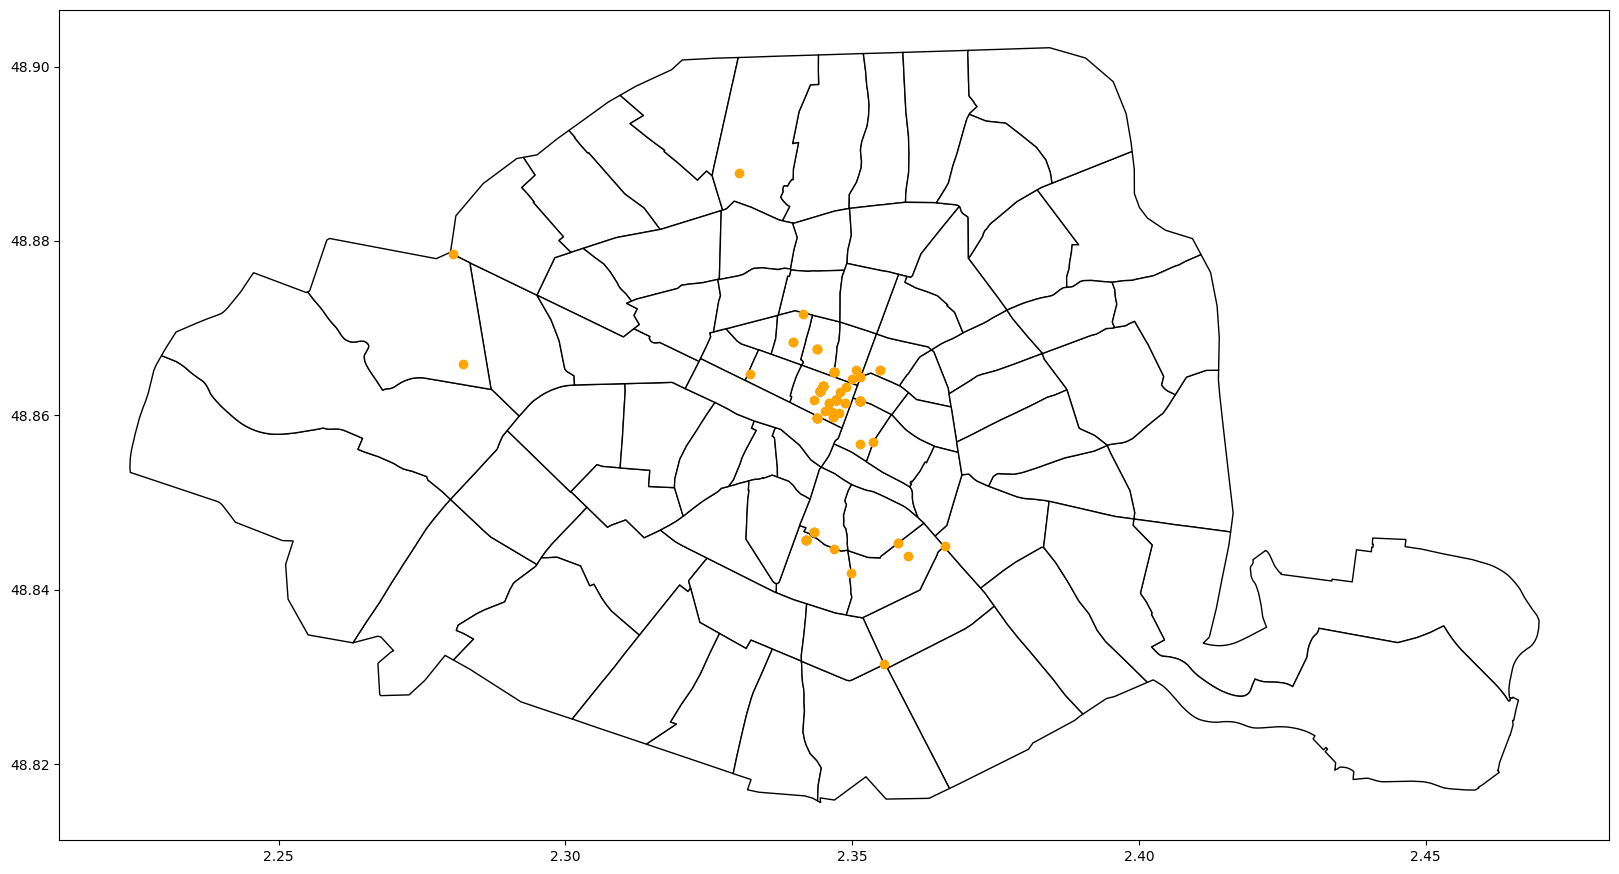

In [235]:
ax = gdf_quartier.plot(figsize = (20, 28), color='white', edgecolor='black')

joined_df.plot(ax = ax, color='orange')

Prochaines étapes possibles :
- ajouter des labels pour les ponctuels et les emprises par exemple
- créer une carte [choroplèthe](https://fr.wikipedia.org/wiki/Carte_choropl%C3%A8the)
...


#Annexe: Toponym geocoding

Perdido:

`Moncla, L. and Gaio, M. (2023). Perdido: Python library for geoparsing and geocoding French texts. In proceedings of the First International Workshop on Geographic Information Extraction from Texts (GeoExT'23), ECIR Conference, Dublin, Ireland.`

Module python disponible : https://pypi.org/project/perdido/

Une alternative, GeoNER:

`ACM SIGSPATIAL GeoHumanities 2020 : Eleni Kogkitsidou & Philippe Gambette, “Normalisation of 16th and 17th century texts in French and geographical named entity recognition”. ACM SIGSPATIAL GeoHumanities’20, p. 28-34, DOI : 10.1145/3423337.3429437.`

https://github.com/kogkitse/geoner

In [229]:
!pip install perdido

In [230]:
from perdido.geocoder import Geocoder
geocoder = Geocoder()
doc = geocoder('Lyon')

In [231]:
doc.geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [4.832011, 45.757814]},
   'properties': {'id': 0,
    'name': 'Lyon',
    'sourceName': 'Lyon, Métropole de Lyon, Rhône, Auvergne-Rhône-Alpes, France métropolitaine, France',
    'type': 'administrative',
    'country': 'France',
    'source': 'nominatim'}}]}